Конвейеры генераторов

Как мы уже знаем, у итераторов есть замечательная особенность: их можно комбинировать. Это позволяет вместо огромных циклов с перемешанными этапами обработки писать небольшие блоки, которые стыкуются друг с другом. К примеру, мы часто использовали встроенные функции filter() и map(), для того чтобы сначала отфильтровать данные, а затем их преобразовать.

In [1]:
numbers = [1, 2, -9, 8, 3, -4, -2, -1, 0, 2, 91, 69]

odd_numbers = filter(lambda num: num % 2, numbers)

abs_odd_numbers = map(abs, odd_numbers)

print(*abs_odd_numbers)

1 9 3 1 91 69


Генераторы являются итераторами, поэтому мы можем компоновать их, создавая тем самым так называемые конвейеры (цепочки) генераторов.

In [2]:
def integers(n):
    for i in range(1, n + 1):
        yield i


def evens(iterable):
    for i in iterable:
        if not i % 2:
            yield i


def squared(iterable):
    for i in iterable:
        yield i * i


def negated(iterable):
    for i in iterable:
        yield -i


chain = negated(squared(evens(integers(10))))

print(*chain)

-4 -16 -36 -64 -100


Самое главное в конвейерах генераторов это то, что обработка данных происходит по одному элементу за раз. Между этапами обработки в цепочке нет буферизации: генератор целых чисел выдает единственное значение, скажем, 4. Это активирует генератор четных чисел, который обрабатывает это значение, и поскольку оно четное, передает его на следующий этап в виде числа 4. Далее активируется генератор квадратов, который обрабатывает значение 4 и передает его на следующий этап как 4 в степени 2 =16. Далее активируется генератор инвертирования знака, который изменяет знак числа 16 на противоположный и порождает значение −16.

Мы можем продолжать расширять эту цепочку генераторов, чтобы построить конвейер обработки со многими шагами. Он по-прежнему будет работать эффективно и может быть легко изменен, поскольку каждый шаг в цепочке представляет собой отдельную генераторную функцию.

Конвейеры данных выглядят еще нагляднее, если они построены на основе генераторных выражений.

In [3]:
# полностью аналогичен примеру выше.
n = 10

integers = (i for i in range(1, n + 1))
evens = (i for i in integers if not i % 2)
squared = (i * i for i in evens)
negated = (-i for i in squared)

print(*negated)

-4 -16 -36 -64 -100


Читабельность кода повышается за счет того, что вместо цикла с перемешанными этапами обработки данных, мы пишем небольшие блоки, отвечающие за конкретные задачи, которые стыкуются друг с другом.

Обработка больших файлов с помощью конвейеров генераторов

Конвейеры данных, построенные на генераторах позволяют скомпоновать код для обработки больших наборов данных без использования большого количества памяти компьютера. Представим, что у нас есть очень большой текстовый файл в формате csv с именем data.csv, содержащий данные посещения сайтов, которые нужно обработать.

Заголовок файла data.csv имеет вид:

user_id,user_name,user_ip,date,page_url

Для обработки такого файла необходимо проделать следующие шаги:

открыть файл для чтения
прочитать каждую строку файла
разбить каждую строку через разделитель , на список значений
извлечь имена столбцов
использовать имена столбцов и список значений из строк для создания словарей
отфильтровать не подходящие строки
обработать интересующие значения

Все указанные выше шаги можно выполнить при помощи нескольких генераторов.

Шаг 1. Открываем файл data.csv для чтения:

In [ ]:
with open('data.csv', 'r', encoding='utf-8') as file:
# обрабатываем содержимое файла

Шаг 2. Читаем каждую строку с помощью генераторного выражения:

In [ ]:
with open('data.csv', 'r', encoding='utf-8') as file:
    file_lines = (line for line in file)

Шаг 3. Разбиваем строки файла через  разделитель , на список значений:

In [ ]:
with open('data.csv', 'r', encoding='utf-8') as file:
    file_lines = (line for line in file)
    line_values = (line.rstrip().split(',') for line in file_lines)

Шаг 4. Извлекаем первую строку, которая является названием столбцов:

In [ ]:
with open('data.csv', 'r', encoding='utf-8') as file:
    file_lines = (line for line in file)
    line_values = (line.rstrip().split(',') for line in file_lines)
    file_headers = next(line_values)

Шаг 5. Соединяем названия столбцов с соответствующими им значениями:

In [ ]:
with open('data.csv', 'r', encoding='utf-8') as file:
    file_lines = (line for line in file)
    line_values = (line.rstrip().split(',') for line in file_lines)
    file_headers = next(
        line_values)  # После выполнения file_headers = next(line_values), генератор line_values "продвинулся" на одну строку вперёд, и теперь он больше не содержит заголовков.
    line_dicts = (dict(zip(file_headers, data)) for data in
                  line_values)  # Так как line_dicts — генераторное выражение, он не загружает весь CSV в память, а создаёт словари лениво, по мере необходимости. Это делает код очень эффективным для работы с большими файлами.

Шаг 6. Фильтруем неподходящие строки и оставляем только те, в которых столбец page_url содержит текст stepik.org:

In [ ]:
with open('data.csv', 'r', encoding='utf-8') as file:
    file_lines = (line for line in file)
    line_values = (line.rstrip().split(',') for line in file_lines)
    file_headers = next(line_values)
    line_dicts = (dict(zip(file_headers, data)) for data in line_values)

    result = (
        (line['user_name'], line['user_ip'])
        for line in line_dicts
        if 'stepik.org' in line['page_url']
    )

Необходимо понимать и помнить, что приведенный выше код не перебирает содержимое в генераторе result. Ничего не будет исполняться, пока не будет задействована итерация (явная или неявная) по генератору result.

Шаг 7. Обрабатываем интересующие значения:

In [ ]:
with open('data.csv', 'r', encoding='utf-8') as file:
    file_lines = (line for line in file)
    line_values = (line.rstrip().split(',') for line in file_lines)
    file_headers = next(line_values)
    line_dicts = (dict(zip(file_headers, data)) for data in line_values)

    result = (
        (line['user_name'], line['user_ip'])
        for line in line_dicts
        if 'stepik.org' in line['page_url']
    )

    for index, (name, ip) in enumerate(set(result), 1):
        print(f'{index}. {name} --- {ip}')

Функция set() заставляет работать все созданные генераторы вместе. Все они функционируют как один конвейер больших данных, при этом в память попадают только нужные строки.

Производительность при использовании генераторов

Как уже было сказано, генераторы (генераторные выражения или генераторные функции) идеально подходят, когда необходимо прочитать содержимое большого файла.

Чтобы наглядно показать преимущество использования генераторов, создадим две функции read_immediately() и read_lazy(), которые читают содержимое текстового файла:

первая функция читает все непустые строки файла и заносит их в список, который затем возвращает с помощью оператора return
вторая функция читает все непустые строки файла и возвращает их с помощью оператора yield

In [ ]:
def read_immediately(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        result = []
        for line in file:
            line = line.rstrip('\n')
            if line != '':
                result.append(line)
        return result


def read_lazy(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.rstrip('\n')
            if line != '':
                yield line

Запустив указанные функции на файлах разных размеров, получим следующие результаты:

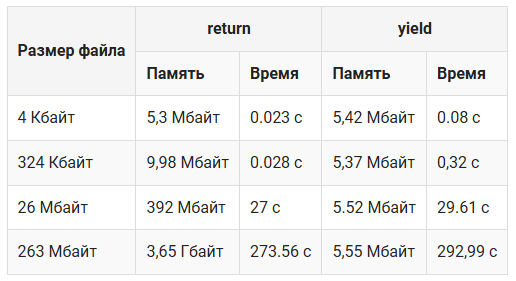

In [4]:
from functions import picture

picture('Без иаомени.png')

Видно, что в обоих случаях время увеличивается с примерно одинаковой скоростью, а количество потребляемой памяти сильно различается. Чем больше обрабатываемый файл, тем заметнее различие.

Примечания

Примечание 1. Мы можем использовать и генераторные функции и генераторные выражения для построения конвейеров обработки данных. При проектировании конвейеров генераторов один генератор вкладывается в другой.

Примечание 2. Генераторы — невероятно мощная программная конструкция. Они позволяют писать потоковый код с меньшим количеством промежуточных данных. Кроме того, они более эффективно используют память и ЦП.

Программный код:

In [ ]:
def something():
    result = []
    for ... in ...:
        result.append(x)
    return result

можно заменить на:

In [ ]:
def iter_something():
    for ... in ...:
        yield x

При этом, если действительно нужны возможности списка (тип list), то можно написать: 

In [ ]:
def something():
    return list(iter_something())

Вам доступен именованный кортеж Person, который содержит данные о человеке. Первым элементом именованного кортежа является имя и фамилия человека, вторым — национальность, третьим — пол, четвертым — год рождения, пятым — год смерти. Если человек жив, год смерти считается равным 0. Также доступен список persons, содержащий эти кортежи.

Дополните приведенный ниже код с использованием конвейеров генераторов, чтобы он вывел имя и фамилию самого молодого живого мужчины (male) из Швеции (Swedish).

In [64]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'nationality', 'sex', 'birth', 'death'])

persons = [Person('E. M. Ashe', 'American', 'male', 1867, 1941),
           Person('Goran Aslin', 'Swedish', 'male', 1980, 0),
           Person('Erik Gunnar Asplund', 'Swedish', 'male', 1885, 1940),
           Person('Genevieve Asse', 'French', 'female', 1949, 0),
           Person('Irene Adler', 'Swedish', 'female', 2005, 0),
           Person('Sergio Asti', 'Italian', 'male', 1926, 0),
           Person('Olof Backman', 'Swedish', 'male', 1999, 0),
           Person('Alyson Hannigan', 'Swedish', 'female', 1940, 1987),
           Person('Dana Atchley', 'American', 'female', 1941, 2000),
           Person('Monika Andersson', 'Swedish', 'female', 1957, 0),
           Person('Shura_Stone', 'Russian', 'male', 2000, 0),
           Person('Jon Bale', 'Swedish', 'male', 2000, 0)]

males = (i for i in persons if i.sex == 'male')
nation = (i for i in males if i.nationality == 'Swedish')
alive = (i for i in nation if i.death == 0)
alive = list(alive)
max_birth_year = max(i.birth for i in alive)

year = (i for i in alive if i.birth == max_birth_year)
for i in year:
    print(f'{i.name}')


Jon Bale


In [65]:
swed = (i for i in persons if i.nationality == 'Swedish')
alive_swed = (i for i in swed if i.death == 0)
men_alive_swed = (i for i in alive_swed if i.sex == 'male')
young_men_alive_swed = max(men_alive_swed, key=lambda x: x.birth)
print(young_men_alive_swed.name)

Jon Bale


Функция parse_ranges()
Назовем диапазоном запись двух натуральных чисел через дефис a-b, где a — левая граница диапазона, b — правая граница диапазона, причем a <= b. Диапазон содержит в себе все числа от a до b включительно. Например, диапазон 1-4 содержит числа 1, 2, 3 и 4.

Реализуйте генераторную функцию parse_ranges(), которая принимает один аргумент:

ranges — строка, в которой через запятую указаны диапазоны чисел
Функция должна возвращать генератор, порождающий последовательность чисел, содержащихся в диапазонах ranges.

In [3]:
def parse_ranges(ranges: str):
    rang = (tuple(map(int, i.split('-'))) for i in ranges.split(','))
    numbers = (i for start, end in rang for i in range(start, end + 1))
    return numbers


print(*parse_ranges('1-2,4-4,8-10'))

print(*parse_ranges('1-10,2-10'))

print(*parse_ranges('7-32'))

1 2 4 8 9 10
1 2 3 4 5 6 7 8 9 10 2 3 4 5 6 7 8 9 10
7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32


In [ ]:
def parse_ranges(ranges: str):
    for r in ranges.split(","):
        start, end = map(int, r.split("-"))
        yield from range(start, end + 1)

In [ ]:
def parse_ranges(ranges):
    return (j
            for i in ranges.split(',')
            for a, b in [i.split('-')]
            for j in range(int(a), int(b) + 1))

In [5]:
def parse_ranges(ranges):
    list_ranges = (el for el in ranges.split(','))
    lim_ranges = (tuple(map(int, el.split('-'))) for el in list_ranges)
    form_ranges = (range(el[0], el[1] + 1) for el in lim_ranges)
    result = (i for el in form_ranges for i in el)
    return result


print(*parse_ranges('1-2,4-4,8-10'))

1 2 4 8 9 10


Функция filter_names()
Реализуйте генераторную функцию filter_names(), которая принимает три аргумента в следующем порядке:

names — список имен
ignore_char — одиночный символ
max_names — натуральное число
Функция должна возвращать генератор, порождающий max_names имён из списка names, игнорируя имена, которые

начинаются на ignore_char (в любом регистре)
содержат хотя бы одну цифру
Если max_names больше количества имен в списке names, то генератор должен породить все возможные имена из данного списка. 

Примечание 1. Имена в возвращаемом функцией генераторе должны располагаться в своем исходном порядке.

In [1]:
def filter_names(names: list, ignore_char: str, max_names: int):
    filter_names = (i for i in names if i[0].lower() != ignore_char.lower())
    alfa_names = (i for i in filter_names if all(j.isalpha() for j in i.split()))
    for i, e in enumerate(alfa_names, 1):
        if i > max_names:
            break
        yield e


data = ['Dima', 'Timur', 'Arthur', 'Anri20', 'Arina', 'German', 'Ruslan']
print(*filter_names(data, 'D', 3))

data = ['Dima', 'Timur', 'Arthur', 'Anri20', 'Arina', 'German', 'Ruslan']
print(*filter_names(data, 't', 20))

data = ['Di6ma', 'Ti4mur', 'Ar5thur', 'Anri7620', 'Ar3453ina', '345German', 'Ruslan543', 'Soslanfsdf123', 'Geo000000r']
print(*filter_names(data, 'A', 100))

Timur Arthur Arina
Dima Arthur Arina German Ruslan


Инвестиции
Вам доступен файл data.csv, который содержит информацию об инвестициях в различные стартапы. В первом столбце записано название компании (стартапа), во втором — инвестируемая сумма в долларах, в третьем — раунд инвестиции:

company,raisedAmt,round
LifeLock,6850000,b
LifeLock,6000000,a
LifeLock,25000000,c
MyCityFaces,50000,seed
Flypaper,3000000,a
...
Напишите программу с использованием конвейеров генераторов, определяющую общую сумму, которая была инвестирована в раунде а, и выводящую полученный результат.

Примечание 1. Разделителем в файле data.csv является запятая, при этом кавычки не используются.

In [13]:
with open('data.csv', 'r', encoding='utf-8') as file:
    file_lines = (line for line in file)
    line_values = (line.rstrip().split(',') for line in file_lines)
    file_headers = next(line_values)
    line_dicts = (dict(zip(file_headers, data)) for data in line_values)

    result = (
        int(line['raisedAmt'])
        for line in line_dicts
        if 'a' == line['round']
    )

    print(sum(result))

4380015000


In [ ]:
import csv

with open('data.csv', encoding='utf8') as file:
    reader = csv.reader(file)
    header = next(reader)
    print(sum(int(line[1]) for line in reader if line[3] == 'a'))

Функция years_days()
Реализуйте генераторную функцию years_days(), которая принимает один аргумент:

year — натуральное число
Функция должна возвращать генератор, порождающий последовательность всех дат (тип date) в году year.

Примечание 1. Возьмем в качестве примера 2022 год. В январе этого года 31 день, в феврале — 28, в марте — 31, и так далее. Тогда генератор, полученный при вызове years_days(2022), должен порождать сначала все даты с 1 по 31 января, затем с 1 по 28 февраля, и так далее до 31 декабря.

In [10]:
from datetime import timedelta, date


def years_days(year: int):
    out = date(year, 1, 1)
    end = date(year, 12, 31)
    while out <= end:
        yield out.strftime('%Y-%m-%d')
        out += timedelta(days=1)


dates = years_days(2077)
print(*dates)

2077-01-01 2077-01-02 2077-01-03 2077-01-04 2077-01-05 2077-01-06 2077-01-07 2077-01-08 2077-01-09 2077-01-10 2077-01-11 2077-01-12 2077-01-13 2077-01-14 2077-01-15 2077-01-16 2077-01-17 2077-01-18 2077-01-19 2077-01-20 2077-01-21 2077-01-22 2077-01-23 2077-01-24 2077-01-25 2077-01-26 2077-01-27 2077-01-28 2077-01-29 2077-01-30 2077-01-31 2077-02-01 2077-02-02 2077-02-03 2077-02-04 2077-02-05 2077-02-06 2077-02-07 2077-02-08 2077-02-09 2077-02-10 2077-02-11 2077-02-12 2077-02-13 2077-02-14 2077-02-15 2077-02-16 2077-02-17 2077-02-18 2077-02-19 2077-02-20 2077-02-21 2077-02-22 2077-02-23 2077-02-24 2077-02-25 2077-02-26 2077-02-27 2077-02-28 2077-03-01 2077-03-02 2077-03-03 2077-03-04 2077-03-05 2077-03-06 2077-03-07 2077-03-08 2077-03-09 2077-03-10 2077-03-11 2077-03-12 2077-03-13 2077-03-14 2077-03-15 2077-03-16 2077-03-17 2077-03-18 2077-03-19 2077-03-20 2077-03-21 2077-03-22 2077-03-23 2077-03-24 2077-03-25 2077-03-26 2077-03-27 2077-03-28 2077-03-29 2077-03-30 2077-03-31 2077-04-01

Функция nonempty_lines()
Реализуйте генераторную функцию nonempty_lines(), которая принимает один аргумент:

file — название текстового файла, например, data.txt
Функция должна возвращать генератор, порождающий последовательность всех непустых строк файла file с убранным символом переноса строки \n. Если строка содержит более 25 символов, она заменяется многоточием ....

Примечание 1. При открытии файла используйте явное указание кодировки UTF-8.

In [27]:
def nonempty_lines(file: str):
    with open(file, 'r', encoding='utf-8') as file:
        none_empty = (line for line in file if line.strip() != '')
        escape_n = (line.strip('\n') for line in none_empty)
        result = (
            line if len(line) <= 25 else '...'
            for line in escape_n
        )
        yield from result


# Вариант с return вызывает ошибку: типа когда ты вернул генератор - with закроет файл и генератор не сможет работать

def nonempty_lines(file):
    with open(file, encoding='utf-8') as f:
        yield from ('...' if len(i.strip()) > 25 else i.strip() for i in f if i.strip() != '')


lines = nonempty_lines('file1.txt')
print(next(lines))
print(next(lines))
print(next(lines))
print(next(lines))

print(*nonempty_lines('file2.txt'))

bee
geek
stepik
aaaaaaaaaaaaaaaaaaaaaaaaa
short line another short line ... end of file


Функция txt_to_dict()
Вам доступен файл planets.txt, содержащий информацию о различных планетах. В первых четырех строках указаны характеристики первой планеты, после чего следует пустая строка, затем характеристики второй планеты, и так далее:

Name = Mercury
Diameter = 4879.4
Mass = 3.302×10^23
OrbitalPeriod = 0.241

Name = Venus
Diameter = 12103.6
Mass = 4.869×10^24
OrbitalPeriod = 0.615

...
Реализуйте генераторную функцию txt_to_dict(), которая не принимает никаких аргументов.

Функция должна возвращать генератор, порождающий последовательность словарей, каждый из которых содержит информацию об очередной планете из файла planets.txt, а именно ее название, диаметр, массу и орбитальный период. Например:

{'Name': 'Mercury', 'Diameter': '4879.4', 'Mass': '3.302×10^23', 'OrbitalPeriod': '0.241'}
Примечание 1. Указанный файл доступен по ссылке.

Примечание 2. При открытии файла используйте явное указание кодировки UTF-8.

In [112]:
from collections import namedtuple

Planets = namedtuple('Planet', ['Name', 'Diameter', 'Mass', 'OrbitalPeriod'])


def txt_to_dict():
    block = []
    package = []
    with open('planets.txt', 'r', encoding='utf-8') as file:
        separated_info = (line.strip() for line in file)
        for line in separated_info:
            if line:
                data = line.split(' = ')[1]
                package.append(data)
            else:  # Если встречаем пустую строку — это конец одной записи
                planet = Planets(
                    Name=package[0],
                    Diameter=package[1],
                    Mass=package[2],
                    OrbitalPeriod=package[3]
                )
                block.append(planet)
                package = []
        # Добавляем последнюю планету, если файл не заканчивается пустой строкой
        if package:
            planet = Planets(
                Name=package[0],
                Diameter=package[1],
                Mass=package[2],
                OrbitalPeriod=package[3]
            )
            block.append(planet)

    result = (planet._asdict() for planet in block)
    yield from result


# planets = txt_to_dict()
# print(next(planets))
# print(next(planets))
# print(next(planets))
# print(next(planets))
# print(next(planets))

planets = txt_to_dict()
print(*planets)

{'Name': 'Mercury', 'Diameter': '4879.4', 'Mass': '3.302×10^23', 'OrbitalPeriod': '0.241'} {'Name': 'Venus', 'Diameter': '12103.6', 'Mass': '4.869×10^24', 'OrbitalPeriod': '0.615'} {'Name': 'Earth', 'Diameter': '12756.3', 'Mass': '5.974×10^24', 'OrbitalPeriod': '1'} {'Name': 'Mars', 'Diameter': '6794.4', 'Mass': '6.419×10^23', 'OrbitalPeriod': '1.881'} {'Name': 'Jupiter', 'Diameter': '142984', 'Mass': '1.899×10^27', 'OrbitalPeriod': '11.86'} {'Name': 'Saturn', 'Diameter': '120536', 'Mass': '5.688×10^26', 'OrbitalPeriod': '29.46'} {'Name': 'Uranus', 'Diameter': '51118', 'Mass': '8.683×10^25', 'OrbitalPeriod': '84.01'} {'Name': 'Neptune', 'Diameter': '49572', 'Mass': '1.024×10^26', 'OrbitalPeriod': '164.79'} {'Name': 'Pluton', 'Diameter': '2370.0', 'Mass': '1.3×10^22', 'OrbitalPeriod': '247.7406624'}


In [102]:
def txt_to_dict():
    with open('planets.txt', 'r', encoding='utf-8') as file:
        items = (i.split('\n') for i in file.read().split('\n\n'))
        return (dict(i.split(' = ') for i in planet) for planet in items)

Mercury


Особенности итераторов

Очень часто начинающие программисты ошибочно считают, что range объекты (объекты, которые возвращает встроенная функция range()) являются итераторами. Эта ошибка может показаться незначительной, но на самом деле она является достаточно грубой. И range объекты, и итераторы являются ленивыми, но ленивы они по-разному.

В языке Python под итерируемым объектом подразумевают объект, который можно итерировать, то есть проходиться по нему, перебирая каждый элемент раз за разом. При этом под итератором подразумевают объект, который возвращает свои элементы по одному за раз.

Получить итератор из любого итерируемого объекта можно, используя встроенную функцию iter():

In [113]:
list_iterator = iter([1, 2, 3])  # итератор на основе списка
str_iterator = iter('beegeek')  # итератор на основе строки

Когда у нас есть итератор, единственное, что мы можем с ним сделать, это получить его следующий элемент, используя встроенную функцию next().

In [114]:
list_iterator = iter([1, 2, 3])
str_iterator = iter('beegeek')

print(next(list_iterator))
print(next(list_iterator))

print(next(str_iterator))
print(next(str_iterator))
print(next(str_iterator))

1
2
b
e
e


Как только итератор вернул все свои элементы, мы будем получать исключение StopIteration при очередном вызове функции next().

In [115]:
list_iterator = iter([1, 2, 3])

print(next(list_iterator))
print(next(list_iterator))
print(next(list_iterator))

print(next(list_iterator))

1
2
3


StopIteration: 

Все итераторы также являются итерируемыми объектами, то есть мы можем получить итератор от итератора, при этом он вернет сам себя.

In [116]:
list_iterator = iter([1, 2, 3])
new_iterator = iter(list_iterator)

print(list_iterator is new_iterator)

True


Важно отметить, что итераторы являются одноразовыми объектами, то есть они сохраняют свое состояние. Это означает, что как только мы получили очередной элемент итератора, получить его вновь мы уже не сможем.

In [117]:
list_iterator = iter([1, 2, 3])

print(list(list_iterator))  # получаем все элементы итератора
print(list(list_iterator))

[1, 2, 3]
[]


In [118]:
list_iterator = iter([1, 2, 3])

print(2 in list_iterator)
print(2 in list_iterator)
print(2 in list_iterator)

True
False
False


В Python встроенные функции enumerate(), zip(), reversed() и другие возвращают итераторы.

In [119]:
numbers = [1, 2, 3]

print(enumerate(numbers))
print(zip(numbers, numbers))
print(reversed(numbers))

Генераторы (генераторная функция или генераторное выражение) — это один из самых простых способов создания собственных итераторов.

In [120]:
numbers = [1, 2, 3]

squares = (n ** 2 for n in numbers)
print(squares)

<generator object <genexpr> at 0x000002D2448E9490>


Таким образом, итераторы — это ленивые, одноразовые итерируемые объекты. Они ленивые, потому что у них есть возможность вычислять элементы только по мере того, как мы их перебираем. Они одноразовые, потому что как только мы использовали элемент из итератора, он исчезает навсегда.

Особенности range объектов

Объекты, возвращаемые функцией range(), являются итерируемыми объектами.

In [121]:
for i in range(3):
    print(i)

print(list(range(5, 10)))
print(tuple(range(5, 50, 5)))

0
1
2
[5, 6, 7, 8, 9]
(5, 10, 15, 20, 25, 30, 35, 40, 45)


С помощью функции iter() мы можем получить итератор на основе range объекта.

In [122]:
range_iterator = iter(range(3))

print(range_iterator)

Важно понимать, что сам range объект итератором не является. Мы не можем вызвать функцию next(), передав в нее в качестве аргумента range объект.

In [123]:
range_obj = range(3)

print(next(range_obj))

TypeError: 'range' object is not an iterator

В отличие от итераторов, мы можем итерировать по одному range объекту сколько угодно раз, каждый раз получая все его элементы.

In [124]:
range_obj = range(3)

print(list(range_obj))
print(list(range_obj))

[0, 1, 2]
[0, 1, 2]


Объекты, возвращаемые функцией range(), в отличие от объектов, возвращаемых функциями enumerate(), zip(), reversed(), итераторами не являются.

Объект range в некотором смысле ленив, потому что он не хранит все свои элементы явно, вместо этого он генерирует нужные значения по мере необходимости.

В отличие от итераторов, мы можем использовать встроенную функцию len(), индексацию и срезы на range объектах.

In [125]:
range_obj = range(5, 50, 5)

print(*range_obj)
print(len(range_obj))
print(range_obj[3])
print(range_obj[-1])
print(range_obj[4:8])

5 10 15 20 25 30 35 40 45
9
20
45
range(25, 45, 5)


Мы также можем повторно определять принадлежность некоторого значения range объекту с помощью оператора in.

In [126]:
range_obj = range(5, 50, 5)

print(15 in range_obj)
print(15 in range_obj)
print(15 in range_obj)

True
True
True


Таким образом, наиболее подходящее описание range объектов — это ленивые последовательности. Это последовательности (подобно спискам, кортежам и строкам), но не хранящие в памяти все свои элементы.

Примечания

Примечание 1. range объекты содержат три атрибута: start, stop, step.

In [127]:
range1 = range(10)
range2 = range(3, 20)
range3 = range(5, 50, 10)

print(range1.start, range1.stop, range1.step)
print(range2.start, range2.stop, range2.step)
print(range3.start, range3.stop, range3.step)

0 10 1
3 20 1
5 50 10


Примечание 2. range объекты можно сравнивать между собой с помощью операторов сравнения == и !=. Два range объекта считаются равными, если они представляют равные последовательности чисел.

In [128]:
range1 = range(10)
range2 = range(0, 10, 1)
range3 = range(5, 50, 10)

print(range1 == range2)
print(range1 == range3)

True
False


Обратите внимание на то, что два равных range объекта могут иметь разные значения атрибутов start, step и stop.

In [129]:
print(range(0) == range(2, 1, 3))
print(range(0, 3, 2) == range(0, 4, 2))

True
True


Примечание 3. Поиск по range объекту с помощью оператора in работает очень быстро, без последовательного перебора всех значений.

Примечание 4. Тип range реализован на языке Cи и является очень быстрым и оптимизированным. 

Функция unique()
Реализуйте генераторную функцию, которая принимает один аргумент:

iterable — итерируемый объект
Функция должна возвращать генератор, порождающий последовательность элементов итерируемого объекта iterable без дубликатов.

Примечание 1. Элементы итерируемого объекта в возвращаемом функцией генераторе должны располагаться в своем исходном порядке.

Примечание 2. Гарантируется, что итерируемый объект, передаваемый в функцию, не является множеством.

In [139]:
def unique(iter):
    st = set()
    for i in iter:
        if i not in st:
            yield i
            st.add(i)


def unique(numbers):
    yield from dict.fromkeys(numbers)


numbers = [1, 2, 2, 3, 4, 5, 5, 5]
print(*unique(numbers))

iterator = iter('111222333')
uniques = unique(iterator)
print(next(uniques))
print(next(uniques))
print(next(uniques))

1 2 3 4 5
1
2
3


Функция stop_on()
Реализуйте генераторную функцию, которая принимает два аргумента в следующем порядке:

iterable — итерируемый объект
obj — произвольный объект
Функция должна возвращать генератор, порождающий последовательность элементов итерируемого объекта iterable до тех пор, пока не будет достигнут элемент, равный obj. Если итерируемый объект iterable не содержит ни одного элемента, равного obj, генератор должен породить все элементы iterable.

Примечание 1. Элементы итерируемого объекта в возвращаемом функцией генераторе должны располагаться в своем исходном порядке.

Примечание 2. Гарантируется, что итерируемый объект, передаваемый в функцию, не является множеством.

In [141]:
def stop_on(iterable, obj):
    st = set()
    for i in iterable:
        st.add(i)
        if obj not in st:
            yield i


# Если функции iter() передается два аргумента, то первый аргумент callable должен являться функцией, а второй аргумент sentinel — некоторым стоп-значением. В этом случае, созданный итератор будет вызывать указанную функцию callable и проверять полученное значение на равенство со значением sentinel. Если полученное значение равно sentinel, то возбуждается исключение StopIteration, иначе итератор выдает значение, полученное из функции callable.

def stop_on(iterable, obj):
    it = iter(iterable)
    return iter(lambda: next(it), obj)


numbers = [1, 2, 3, 4, 5]
print(*stop_on(numbers, 4))

iterator = iter('beegeek')
print(*stop_on(iterator, 'a'))

1 2 3
b e e g e e k


Функция with_previous()
Реализуйте генераторную функцию, которая принимает один аргумент:

iterable — итерируемый объект
Функция должна возвращать генератор, порождающий последовательность кортежей, каждый из которых содержит очередной элемент итерируемого объекта iterable, а также предшествующий ему элемент:

(<очередной элемент>, <предыдущий элемент>)
Для первого элемента предыдущим считается значение None.

Примечание 1. Элементы итерируемого объекта в возвращаемом функцией генераторе должны располагаться в своем исходном порядке.

Примечание 2. Гарантируется, что итерируемый объект, передаваемый в функцию, не является множеством.

In [158]:
def with_previous(iterable):
    iterable = list(iterable).copy()
    for i, v in enumerate(iterable):
        if i == 0:
            i = None
        else:
            i = iterable[i - 1]
        yield v, i

def with_previous(iterable):
    prev = None
    return ((i, prev, prev := i)[:-1] for i in iterable)

numbers = [1, 2, 3, 4, 5]
print(*with_previous(numbers))

iterator = iter('stepik')
print(*with_previous(iterator))

(1, None) (2, 1) (3, 2) (4, 3) (5, 4)
('s', None) ('t', 's') ('e', 't') ('p', 'e') ('i', 'p') ('k', 'i')


In [153]:
# iterator = iter('stepik')
iterator = [1, 2, 3, 4, 5]
iterator = list(iterator)
iterator[0]

1

Функция pairwise()
Реализуйте генераторную функцию, которая принимает один аргумент:

iterable — итерируемый объект
Функция должна возвращать генератор, порождающий последовательность кортежей, каждый из которых содержит очередной элемент итерируемого объекта iterable, а также следующий за ним элемент:

(<очередной элемент>, <следующий элемент>)
Для последнего элемента следующим считается значение None.

Примечание 1. Элементы итерируемого объекта в возвращаемом функцией генераторе должны располагаться в своем исходном порядке.

Примечание 2. Гарантируется, что итерируемый объект, передаваемый в функцию, не является множеством.

In [173]:
def pairwise(iterable):
    iterator = iter(iterable)
    if (prev := next(iterator, None)) is not None:
        for curr in iterator:
            yield prev, curr
            prev = curr
        yield prev, None

numbers = [1, 2, 3, 4, 5]
print(*pairwise(numbers))

iterator = iter('stepik')
print(*pairwise(iterator))

print(list(pairwise([])))

(1, 2) (2, 3) (3, 4) (4, 5) (5, None)
('s', 't') ('t', 'e') ('e', 'p') ('p', 'i') ('i', 'k') ('k', None)
[]


Функция around()
Реализуйте генераторную функцию, которая принимает один аргумент:

iterable — итерируемый объект
Функция должна возвращать генератор, порождающий последовательность кортежей, каждый из которых содержит очередной элемент итерируемого объекта iterable, а также предыдущий и следующий за ним элементы:

(<предыдущий элемент>, <очередной элемент>, <следующий элемент>)
Для первого элемента предыдущим считается значение None, для последнего элемента следующим считается так же значение None.

Примечание 1. Элементы итерируемого объекта в возвращаемом функцией генераторе должны располагаться в своем исходном порядке.

Примечание 2. Гарантируется, что итерируемый объект, передаваемый в функцию, не является множеством.

In [18]:
def around(iterable):
    iterator = iter(iterable)
    prev = None
    curr = next(iterator, None)
    while curr is not None:
        nextt = next(iterator, None)
        yield prev, curr, nextt
        prev, curr = curr, nextt

def around(iterable):
    it = tuple(iterable)
    yield from zip((None, *it), it, (*it[1:], None))

def around(iterable):
    if iterable:
        iterator = iter(iterable)
        b = None
        c = next(iterator)
        yield from ((a:=b, b:=c, c:=d) for d in iterator)
        yield (b, c, None)
        
numbers = [1, 2, 3, 4, 5]
print(*around(numbers))

iterator = iter('hey')
print(*around(iterator))

(None, 1, 2) (1, 2, 3) (2, 3, 4) (3, 4, 5) (4, 5, None)
(None, 'h', 'e') ('h', 'e', 'y') ('e', 'y', None)
